In [ ]:
# import torch
# import cv2
# from transformers import TrOCRProcessor, VisionEncoderDecoderModel
# from PIL import Image

# # Check if CUDA is available and set the device accordingly
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Load the processor and model
# processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to(device)

# # Open the video file
# cap = cv2.VideoCapture("/kaggle/input/vid-test/20240709-174023_AP4u7UqQ.mp4")

# # Set to keep track of already detected texts
# detected_texts = set()
# frame_count = 0
# frame_skip = 10  # Adjust this value to change the frame skipping interval

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     frame_count += 1
#     if frame_count % frame_skip == 0:
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         pil_img = Image.fromarray(frame)

#         # Preprocess the image
#         pixel_values = processor(pil_img, return_tensors="pt").pixel_values.to(device)

#         # Generate text from the image
#         generated_ids = model.generate(pixel_values)

#         # Decode the generated text
#         text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

#         if text and text not in detected_texts:
#             detected_texts.add(text)
#             print(text)

# cap.release()


In [1]:
!wget https://github.com/fontforge/fontforge/blob/45d74411b2ec9b6060bfa58534c636cc30208f7b/pycontrib/FontCompare/unittests/lohit.ttf

--2024-07-10 04:35:59--  https://github.com/fontforge/fontforge/blob/45d74411b2ec9b6060bfa58534c636cc30208f7b/pycontrib/FontCompare/unittests/lohit.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'lohit.ttf'

lohit.ttf               [ <=>                ] 294.35K  --.-KB/s    in 0.06s   

2024-07-10 04:35:59 (4.60 MB/s) - 'lohit.ttf' saved [301417]



In [2]:
!pip install paddleocr paddlepaddle hunspell
!wget -O en_US.aff https://cgit.freedesktop.org/libreoffice/dictionaries/plain/en/en_US.aff
!wget -O en_US.dic https://cgit.freedesktop.org/libreoffice/dictionaries/plain/en/en_US.dic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.3/407.3 kB 10.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 75.4 MB/s eta 0:00:00:00:01
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117031 sha256=61ffa068521a3926c4ad2736375f26ec0f466b71b1213a12bc7587bb8532da82
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


--2024-07-10 04:36:40--  https://cgit.freedesktop.org/libreoffice/dictionaries/plain/en/en_US.aff
Resolving cgit.freedesktop.org (cgit.freedesktop.org)... 131.252.210.161, 2610:10:20:722::83fc:d2a1
Connecting to cgit.freedesktop.org (cgit.freedesktop.org)|131.252.210.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'en_US.aff'

en_US.aff               [ <=>                ]   3.13K  --.-KB/s    in 0s      

2024-07-10 04:36:41 (187 MB/s) - 'en_US.aff' saved [3205]

--2024-07-10 04:36:42--  https://cgit.freedesktop.org/libreoffice/dictionaries/plain/en/en_US.dic
Resolving cgit.freedesktop.org (cgit.freedesktop.org)... 131.252.210.161, 2610:10:20:722::83fc:d2a1
Connecting to cgit.freedesktop.org (cgit.freedesktop.org)|131.252.210.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'en_US.dic'

en_US.dic               [  <=>               ] 538.83K  1.35MB/s    in

In [4]:
import hunspell

spell = hunspell.HunSpell('en_US.dic', 'en_US.aff')

def checker(text):
    words = text.split()

    corrected_text = []
    for word in words:
        if not spell.spell(word):
            suggestions = spell.suggest(word)
            corrected_word = suggestions[0] if suggestions else word
        else:
            corrected_word = word
        corrected_text.append(corrected_word)

    return ' '.join(corrected_text)

In [12]:
from ppocr.utils.logging import get_logger
import logging
logger = get_logger()
logger.setLevel(logging.ERROR)

Date
Page
Chapter-9
Current Electricity
Direct wren is a current constant magnitude Hanging
on direction
In a cell identical energy changes to dialectical energy
When in u
Cw rent is He sate shortchange across a chews section
clitorides
normal to He diction poo cu sent


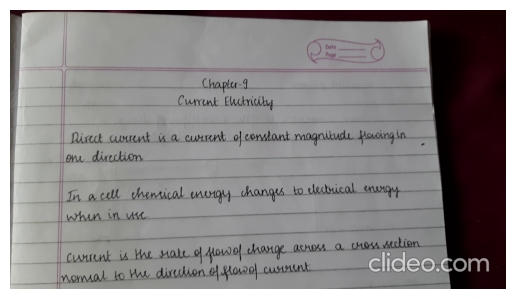

Date
Page
Chapter-9
Current Electricity
Tired cent is a current constant magnitude Hogging
on direction
In cell identical energy changes to electrical energy
when in u
Current is ch sate how change ac nos a chews section
normal to e dironofgowof cu sent
clitorides
wrert(TChage9


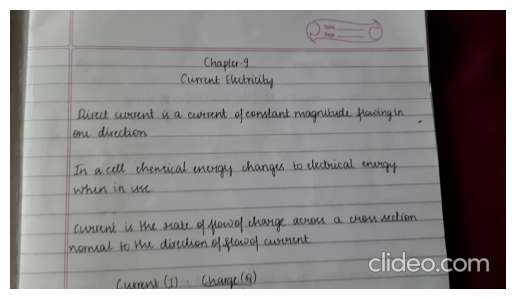

Chapter-9
Current Electricity
Tired cent s a current of constant magnitude Hogging
on direction
In cell identical energy changes to elliptical energy
when in us
Current is He sate showoff change across a cutout section
tonal to he diction showoff cu sent
Cwrent(I):Chargeq
clitorides
intestine
quantity


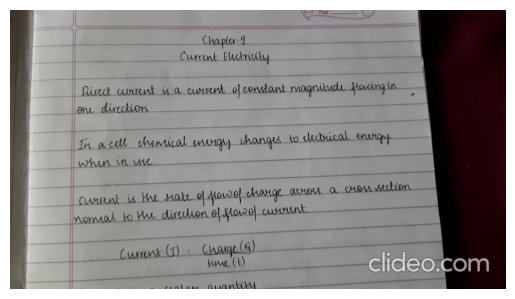

Chapter-9
Current Electricity
Direct abhorrent is a current of constant magnitude Hogging
on direction
In a cell identical energy changes to tactical energy
Shin in us
cent is He sate of Howe change across a chews section
normal to H direction showoff cent
Turbocharger
timeout
clitorides
taunt is a scalar quantity


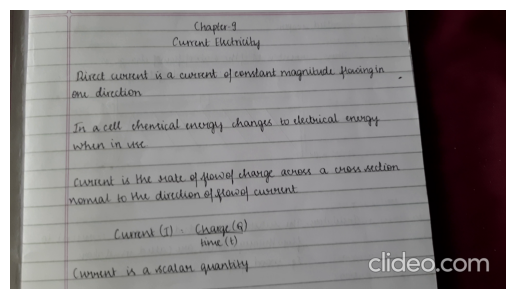

Direct Laurent is a current contestant magnitude Hogging
on direction
In cell identical energy changes to electrical energy
Shin in us
cw rent is He sate ofyowofchaige ac nos a sou section
normal to He direction ofgowoj current
Cw rent Argentina
timeout
Cwnnt is scandal quantity
clitorides
Total change panes e-nee


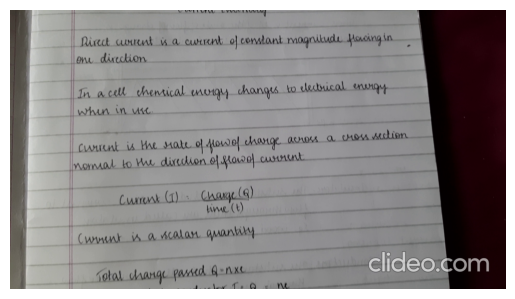

on direction
In cell identical energy changes to electrical grungy
when in us
tonal to H direction showoff cu sent
Nonchargeable
tine
Ninth is a scalar quantity
Nonexchangeable A-nee
and count in constrict Ir
t
homicide
went Hawthorne die tom
MA


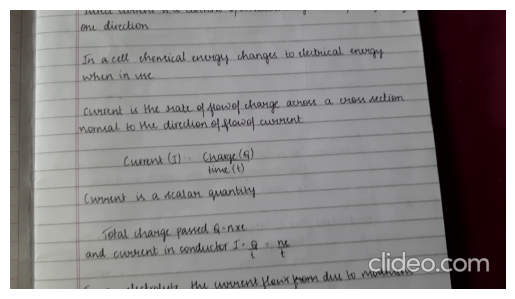

In cell identical energy changes to electrical energy
Shin in us
current is He sate o shortchange ac nos a cos sentient
tonal to H directional custom
Current Argentina
tine
Cwnnt is scandal quantity
Total change pang-nxe
and count in conductress Tn
t
In an destroyer event Henri km dew quo monument
clitorides
q postilion and livelong


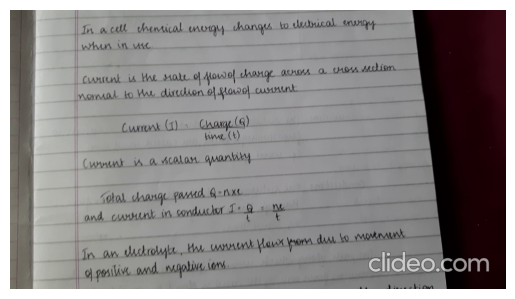

when in ewe
normal to H direction ofpowofcusent
Apprenticeship
tine
Continent is a scalar quantity
ital change passed A-nee
and count in conductor-q=ne
t
Tn an electrolyte event for don dew quo monument
possibility and irrigation
clldeo.com
I direction yo Cw vent is taken positive in thy petition
nondelivery


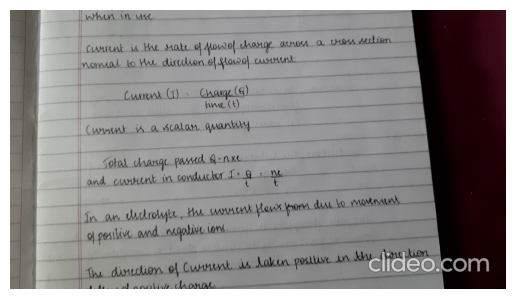

normal to H direction ofgowofcusuunt
Current(I)(nargeq
tine
Count is quantification
Total change panes A-nee
and count in conductor I-qire
C
In an electrolyte event fens kin due quo mount
positive and native ions
Th decline convent is taken positive in ht direction
yow ofpoutivechorge
clitorides
in a direction opposite to the


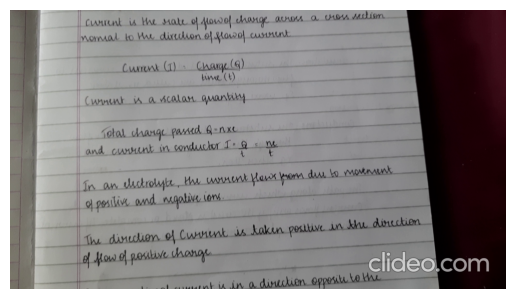

normal to H direction showoff suntan
Cryptocurrency
tine
Ninth is scalar quantity
ital change passed q=nxe
and cuing in semiconductor
t
t
In an electrolyte nonevent Newt lorn DI quo movement
positive and elongation
Thu benedictine of Continent is taken positive in thew benedictine
showoff positive charge


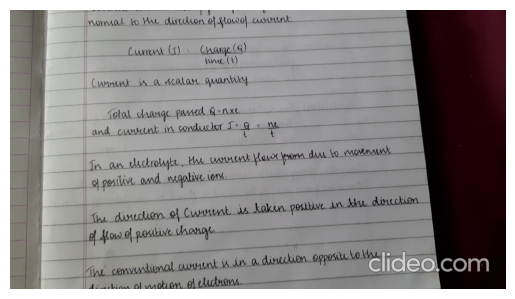

Cwrrent(I:Cnargeq
tine
Entwine is a scalar quantity
Total change passed Anxiety
and cwnnt in semiconductor
t
C
In an electrolyte event Herr lorn DI to mount
positive and native ion
Ohs benedictine yo Continent is taken positive in thew benedictine
showoff interchange
The conventional cu went i in a direction opposite tot
clitorides
distortion yo misconstructions


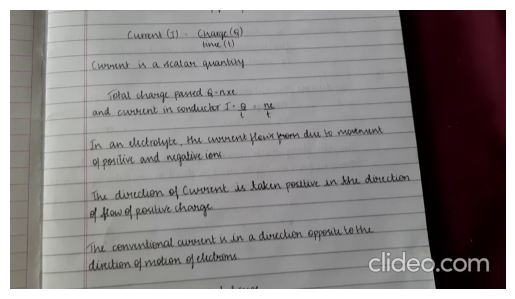

CurentI):Cnargeg
tine
Clint is a scalar quantity
Total changeless Anxiety
and cwnnt in semiconductor
t
t
In an electrolyte went yewtkrorn die quo mount
positivist and native ions
Thu direction a Continent is taken positive in tun benedictine
postoperative chopping
In conventional current is in a benedictine opposite tithe
diction emotion seductions
clitorides
Unit noninterchangeable
unity tine


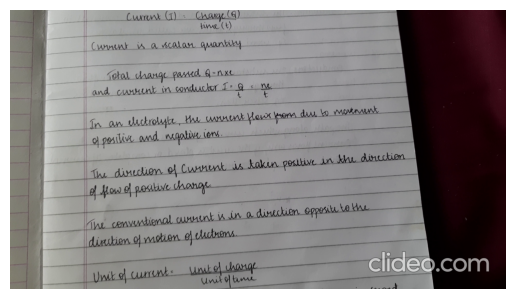

intestine
Unguent is a scalar quantity
Total changed xenon
and cunning in conductor I-gen
t
t
In an electrolyte event Hereon dew quo mount
positive and native ion
Thu direction of Continent is taken positive in tun direction
y How supercharger
The conventional cent is in a direction opposite ch the
differentiation defections
clitorides
Unit ed genitourinary hang
unity tine
ND suit d tine send


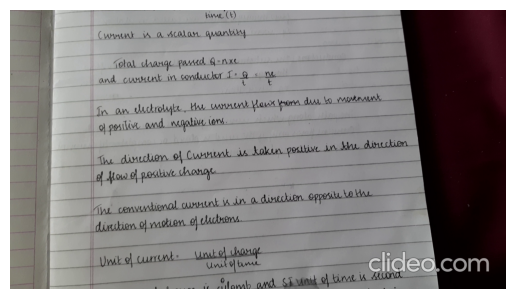

Intuit is a scalar quantity
Total change passed q=nx
and countdown in conductor IQ
t
t
In an electrolyte entwine Herr lorn dew to mount
o positive and elongation
Th direction of Continent is taken positive in thew benedictine
showoff postie change
The conventional cw vent is in a benedictine opposite to ch
distortion ed motion electrons
Unitefcurrinteunitofchange
unsanitary
bonbon Rn unsound we


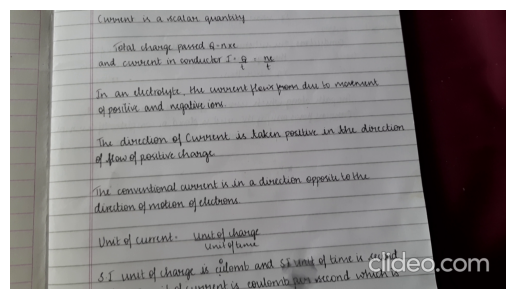

ital change pads exeunt
and content in conductor
Tn an electroshock went skewer kin die BO mount
positive and native ion
Thu direction of Continent is taken positive in tun dinette
fHowolpoutive change
The conventional cwt i in a benedictine opposite to the
dirstionefmotionofeuctrons
Unit of noninterchangeable
unity
s. I unit e change is carillon and stunt o time i second
clitorides
so thew st unit ed cent is cowling pin second chichis


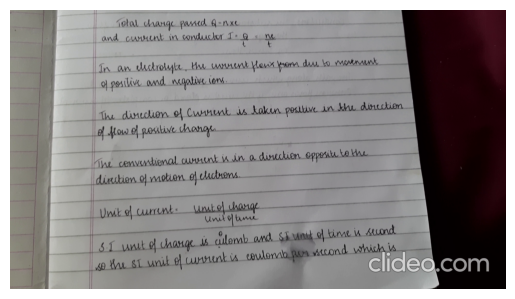

and covenant in semiconductor
In an electrolytic cent Mathewson dew quo mount
positive and negative ion
Thu direction e Continent is taken positive in ht direction
Howe positive charge
The conventional cunning in in a direction opposite toe
distortion ed motion seductions
Unit noninterchangeable
unity tine
s. I unit change is cumulonimbi and sunlit y time i second
SE the til unit ed scientist coulomb pin second which is
clitorides


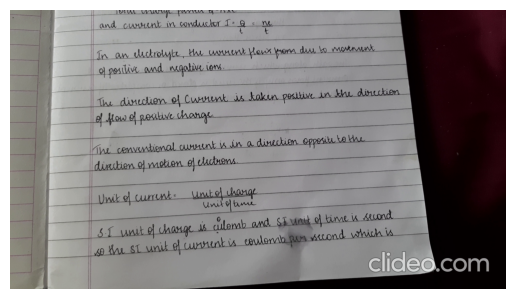

In [9]:
import cv2
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt

ocr = PaddleOCR(use_angle_cls=False, lang='en')
cap = cv2.VideoCapture("/kaggle/input/vid-test/vid/20240709-174023_AP4u7UqQ.mp4")

font_path = '/kaggle/working/lohit.ttf'

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1
    if frame_count == 15:
        frame_count = 0
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        result = ocr.ocr(rgb_frame, cls=True)

        if len(result) > 0:
            for line in result:
                try:
                    for item in line:
                        text = item[1][0]
                        print(checker(text))

                except Exception as e:
                    print(f"An error occurred: {e}")
                    pass

        # Display the frame with OCR results
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

cap.release()


Jul 10
~/projects/blind/pocr.py-Subl
Selection Find View Goto Tools Project Preferences Help
Edit
pocr.py
import cv2
from paddleocr import PaddleocR, draw_ocr
from ppocr.utils.logging import get_logger
import logging
logger =get_logger
logger.setLevel(logging.ERROR)
ocr =PaddleocR(use_angle_cls=True,lang='en')
cap =cv2.VideoCapture(0)
font path ='/home/shusrith/Downloads/Roboto/Roboto-Regular.ttf'
frame_count=0
while True:
ret,frame =cap.read)
if not ret
break
frame_count +=1
frame_count ==15
if
frame_count =0
rgb_frame =cv2.cvtColor(framecv2.COLOR_BGR2RGB)
result =ocr.ocr(rgb_frame,cls=True)
if lenresult)>0
for line in result:
try:
for item in line:
text=item[1][0]
print(text)
boxes=item[0]
score=item[1[1]
%
4
5
6


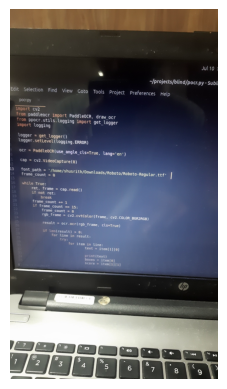

JU
~/projects/blind/pocr.py
Edit Selection Find View Goto Tools Project Preferences Help
ile
pocr.py
import cv2
from paddleocr import PaddleocR, draw ocr
from ppocr.utils.logging import get_logger
import logging
logger =get logger
logger.setLevel(logging.ERROR)
ocr =PaddleOcR(use_angle_cls=True,lang='en
cap=cv2.VideoCapture(0
13
font_path =/home/shusrith/DownLoads/Roboto/Roboto-Regular.ttf
frame count =
while True:
ret,frame =cap.read
if not ret:
break
frame_count +=1
if frame_count =15:
frame count=
rgb_frame=cv2.cvtColorframecv2.COL0R_BGR2RGB)
result=ocr.ocr(rgb_frame,cls=True)
if Lenresult)>0
for line in result:
try:
for item in line:
text=item[1][0]
print(text)
boxes=item[0]
score=1tem1j1
40
@
#
$
2
%
3
4
5
6


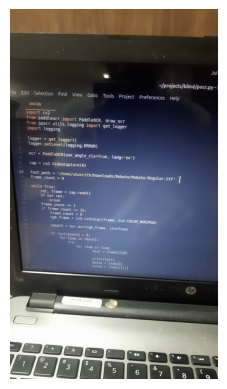

~/projects/blind/pocr.py
File Edit Selection Find View Goto Tools Project Preferences Help
pocrpy
18gger=get l6gger()
tegger:setLevet(logging.ERROR)
eEF = PaddleocR(use_angle_cls=Truelang=en)
Eap = Ev2.videoCapture(
13
font_path =/bome/shusrith/Downloads/R8bot8/R8bt8-RegutaF:tf
trame_count=0
while True:
ret,frame=cap.read
if not ret
break
frame_count +=1
if frame_count=15
frame_count =
rgb_frame=Ev2EVtE8l8F(fFameEV2E0L0R_B6R2R6B
result=8Er8cr(rgb frameEts=TFue)
if lenresult)0
fer tine in Fesut:
try:
ter Item in.Ln
m[110]
BFint(text)
F4ESRE
trame.[boxes].[text).[scorel.font e
10
#
S
%
3
4
5


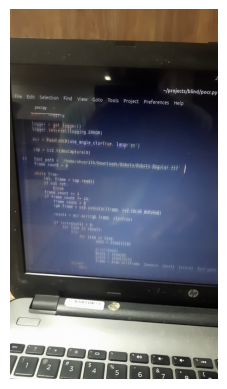

~/projects/blind/pocr.py
File Edit Selection Find View Goto Tools Project Preferences Help
pocr.py
Tame count=
while True:
ret,frame =cap.read
if not ret
break
frame_count +=1
if frame_count ==15:
frame_count=0
rgb_frame =cv2.cvtCoLorframe,cv2.COLOR_BGR2RGB
24
25
result =ocr.ocr(rgb_frame,cls=True)
2E
if lenresult)>0:
for line in result
try:
for item in line:
text=item[1][0]
print(text)
boxes=item[0]
score =
item[1][1]
frame=draw_ocr(frame,
except:
[boxes][text].[score]font_pa
pass
cv2.imshow'Text Detection',frame)
1f cv2.waitKey1)& 0xFF ==ord'q)
break
cap.release()
cv2.destroyAlLwindows()
esc
$
2
3
4


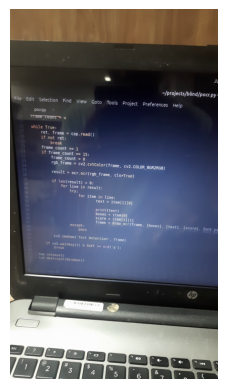

~/projects/blind/pocr.py
File Edit Selection Find View Goto Tools Project Preferences
Help
pocr.py
if not ret
break
frame count +=1
if frame count ==15:
frame_count =0
rgb frame =cv2.cvtColorframecv2.cOL0R_BGR2RGB
result =ocr.ocr(rgb_frameels=True
if lenresult)>0:
for
line in result:
try:
for item in line
text=1tem1][0]
print(text)
boxes=1tem[0]
score=1tem[][]
frame =draw_ocr(frame[boxes][text)[score].font
except:
pass
cv2.imshowText Detectien'frame)
af cv2.waitkey1OxFF==0idqi
break
cap.release()
cv2.destroyaltwindows()
esc
10
@
#
2
%
3
4
X


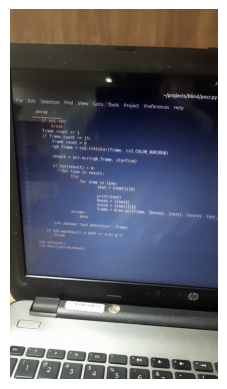

Jul
~/projects/blind/pocr.py
File Edit Selection Find View Goto Tools Project Preferences
Help
pocr.py
frame_count +=1
if
frame count ==15
frame_count =0
rgb_frame =cv2.cvtColorframecv2.COLOR_BGR2RGB)
result=ocr.ocr(rgb_frame,cls=True)
if lenresult)>0
for line in result:
try:
for item in line:
text=item[1][0]
print(text)
boxes =item[0]
85
score=item[1][1]
frame=draw_ocrframe,[boxes],[text][score],font_
except:
pass
cv2.imshow'Text Detection'frame)
if cv2.waitKey1&0xFF=ord'q
break
cap.release
cv2.destroyAllWindows()
esc
@
2
$
%
3
4
5


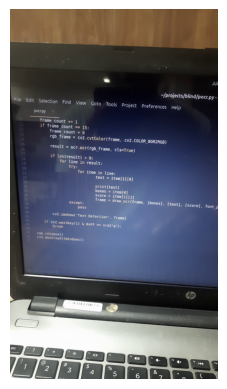

Jul1
~/projects/blind/pocr.py-Su
File Edit Selection Find View Goto Tools Project Preferences
Help
pocr.py
frame count +=1
if frame count ==15:
frame count =
rgb_frame =cv2.cvtColorframe,cv2.COLOR_BGR2RGB
result =ocr.ocr(rgb_frame,cls=True)
if lenresult)>0
for line in result:
try:
for item in line:
text=item[1][0]
print(text)
boxes=item[0]
score=item[1][1]
frame =draw_ocr(frame,
[boxes][text][score]font_pa
except:
pass
cv2.imshow'Text Detection',frame)
if cv2.waitKey1)&0xFF==ord'q)
break
cap.release()
cv2.destroyALlwindows()
10
@
#
2
%
3
4
5


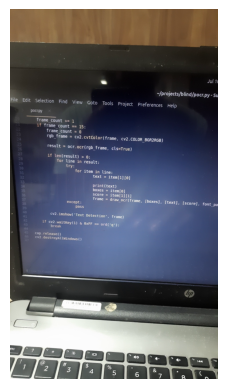

In [11]:
import cv2
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt

ocr = PaddleOCR(use_angle_cls=False, lang='en')
cap = cv2.VideoCapture("/kaggle/input/vid-test/vid2/20240710_102514.mp4")

font_path = '/kaggle/working/lohit.ttf'

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1
    if frame_count == 15:
        frame_count = 0
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        result = ocr.ocr(rgb_frame, cls=True)

        if len(result) > 0:
            for line in result:
                try:
                    for item in line:
                        text = item[1][0]
                        print(text)

                except Exception as e:
                    print(f"An error occurred: {e}")
                    pass

        # Display the frame with OCR results
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

cap.release()
